In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('stroke-data.csv')

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace = True)

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = labelencoder.fit_transform(df[col])

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
features=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [ ]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: >

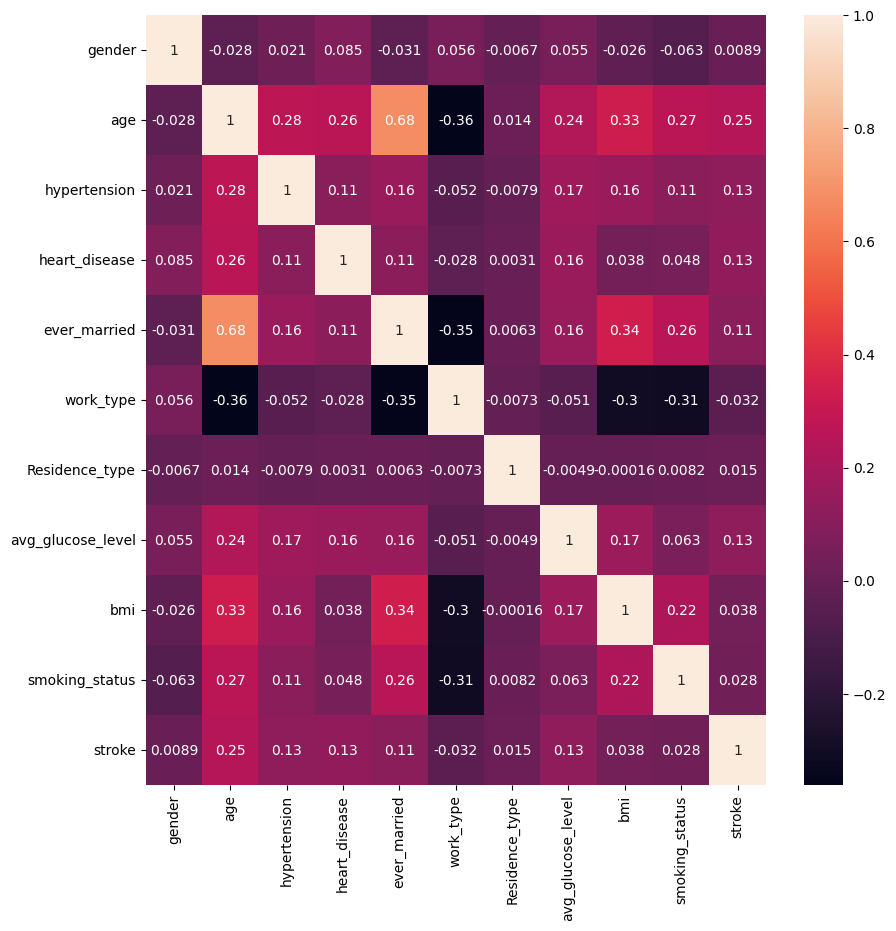

In [ ]:
#visualizing Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:, 0:11].corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.75)

In [ ]:
X_train = train[features]
Y_train = train['stroke']

X_test = test[features]
Y_test = test['stroke']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(X_test, Y_test)

0.9460093896713615

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1208,    4],
       [  65,    1]])

Text(95.72222222222221, 0.5, 'real')

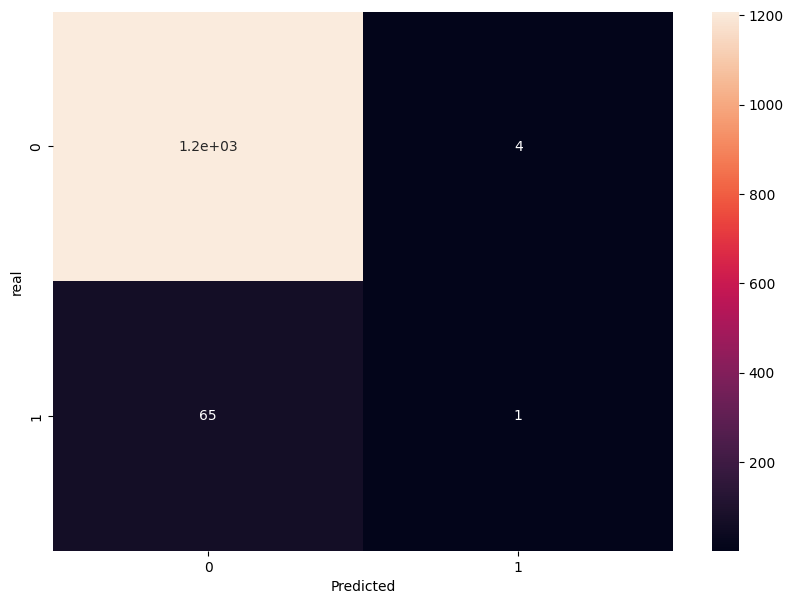

In [ ]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  94.6 %,  1209.0 correct detections
Inaccuracy:  5.4 %,  69.0 Incorrect detections


In [ ]:
df.loc[6]

gender                1.00
age                  74.00
hypertension          1.00
heart_disease         1.00
ever_married          1.00
work_type             2.00
Residence_type        0.00
avg_glucose_level    70.09
bmi                  27.40
smoking_status        2.00
stroke                1.00
Name: 6, dtype: float64

In [ ]:
input_data=(1.00,74.00,1.00,1.00,1.00,2.00,0.00,70.09,27.40,2.00)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction == [1]:
  print("Heart Stroke predicted")
else:
  print(" No Headrt Stroke predicted")




Heart Stroke predicted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'Heart_stroke.sav'
pickle.dump(model, open(filename, 'wb'))